$$\require{mhchem}$$       

# Non-isothermal PFR

The gas-phase oxidation of o-xylene to phthalic anhydride is highly exothermic.  The reaction is carried out PFR bundles with molden salt circulating as the heat transfer fluid.  The o-xylene is mixed with air before entering the PFR. The reaction rate is limited by maintaining a low concentration of hydrocarbon in the feed. The mol fraction of o-xylene is less than 2%.  
\begin{align}
\text{o-xylene} \rightarrow \text{phthalic anhydride} 
\end{align}

Under these conditions, the large excess of oxygen leads to a pseudo-first-order rate expression:
\begin{align*}
r=k_m \exp \left[-E\left(\frac{1}{T}-\frac{1}{T_m}\right)\right] c_x 
\end{align*}
where $c_x$ is the o-xylene concetration.  The operating pressure is atmospheric.  

| Parameter   | Value                  | Units        |
|-------------|------------------------|--------------|
| $k_m$       | 2.0822                 | 1/s          |
| $T_A$       | 625                    | K            |
| $T_m$       | 625                    | K            |
| $P_f$       | 1.0                    | atm          |
| l           | 1.5                    | m            |
| R           | 0.0125                 | m            |
| $\hat{C}_p$ | 0.992                  | kJ/kg K      |
| U           | 0.373                  | kJ/m$^2$ s K |
| $y_{xf}$      | 0.019                  |              |
| E/R         | $1.3636\times 10^4$    | K            |
| $\Delta H_R$ | $-1.284 \times 10^6$   | kJ/mol       |
| $Q\rho$     | $2.6371\times 10^{-3}$ | kg/s         |

$y_{xf}$ is the mol fraction of xylene in the feed. The rest is inert.  The specific heat is constant.  $T_m$ is the reference temperature. $T_a$ is the temperature of the coolant.  The average molecular weight of the inlet feed is 30.387 kg/kmol.

### Calculate the temperature and o-xylene composition profiles for inlet feed temperatures of 610 to 630 K.

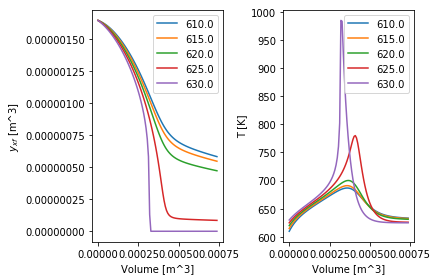

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
km=2.0822 #1/s
Ta=625 #K
Tm=625 #K
Pf=1 #atm
l=1.5 #m
radius=0.0125#m
Cp=0.992 #kJ/kg K
U=0.373 #kJ/m^2 s K
yxf = 0.019
E=1.363E4 #K
dHr=-1.284e6 #kJ/kmol
R=8.205E-5 #m^3 atm / K/mol
Qrho=2.6361E-3 #kg/s
MWf=30.387 #kg/kmol
Ft=Qrho/MWf #kmol/s
V=np.pi*radius**2*l
a=2/radius
def PFR(X,V):
    Fx,T=X
    Q=Ft/(Pf/R/T)
    Cx=Fx/Q #mol/m^3
    r=km*np.exp(-E*(1/T-1/Tm))*Cx/1000 #kmol/m^3/s
    dTdV=(-dHr*r+U*a*(Ta-T))/(Qrho*Cp)
    dFxdV=-r
    return [dFxdV,dTdV]

Tfrange= np.linspace(610,630,5)
for Tf in Tfrange: 
    Vrange=np.linspace(0,V,100)
    sol=odeint(PFR,[Ft*yxf,Tf],Vrange)
    plt.subplot(1, 2, 1)
    plt.plot(Vrange,sol[:,0])
    plt.xlabel('Volume [m^3]')
    plt.ylabel('$y_{xf}$ [m^3]')

    plt.subplot(1, 2, 2)
    plt.plot(Vrange,sol[:,1])
    plt.xlabel('Volume [m^3]')
    plt.ylabel('T [K]')
    
plt.subplot(1, 2, 1)
plt.legend(Tfrange)
plt.subplot(1, 2, 2)
plt.legend(Tfrange)
plt.tight_layout()

plt.show()


###  What is the maximum feed temperature that can be used that keeps the maximum reactor temperature below 700 K?

[ 619.9169785]


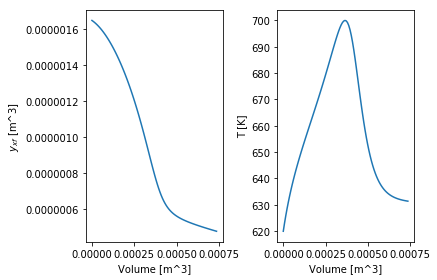

In [2]:
from scipy.optimize import fsolve
Vrange=np.linspace(0,V,100)

def finaltemp(Tf):    
    sol=odeint(PFR,[Ft*yxf,Tf],Vrange)
    return np.abs(np.max(sol[:,1])-700)

feed_temp=fsolve(finaltemp,620)
print(feed_temp)
sol=odeint(PFR,[Ft*yxf,feed_temp],Vrange)
plt.subplot(1, 2, 1)
plt.plot(Vrange,sol[:,0])
plt.xlabel('Volume [m^3]')
plt.ylabel('$y_{xf}$ [m^3]')
plt.subplot(1, 2, 2)
plt.plot(Vrange,sol[:,1])
plt.xlabel('Volume [m^3]')
plt.ylabel('T [K]')
plt.tight_layout()
plt.show()

### We learn that the reaction is reversible.  Calculate the equilibrium constant as a function of temperature from 625 to 800 K on a y-log scale

The reference equilibrium constant at 625 K is $10^8$.  

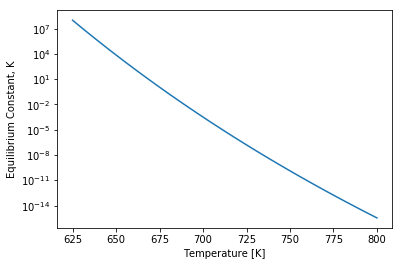

In [3]:
Km=1E8
Trange=np.linspace(625,800)
K=Km*np.exp(-dHr/8.3145*(1/Trange-1/Tm))
plt.semilogy(Trange,K)
plt.xlabel('Temperature [K]')
plt.ylabel('Equilibrium Constant, K')
plt.show()

### Calculate the temperature and o-xylene composition profile for this reversible scenario for inlet feed temperatures of 610 to 630 K.  Explain what's happening.  

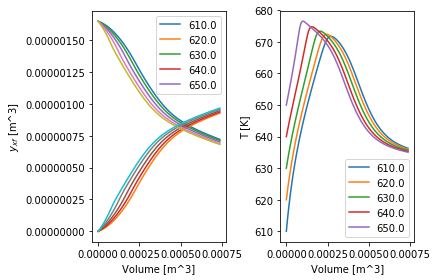

In [4]:
km=2.0822 #1/s
Ta=625 #K
Tm=625 #K
Pf=1 #atm
l=1.5 #m
radius=0.0125#m
Cp=0.992 #kJ/kg K
U=0.373 #kJ/m^2 s K
yxf = 0.019
E=1.363E4 #K
dHr=-1.284e6 #kJ/kmol
R=8.205E-5 #m^3 atm / K/mol
Qrho=2.6361E-3 #kg/s
MWf=30.387 #kg/kmol
Ft=Qrho/MWf #kmol/s
V=np.pi*radius**2*l
a=2/radius
def PFRrev(X,V,Ta):
    Fx,Fy,T=X
    Q=Ft/(Pf/R/T)
    Cx=Fx/Q #mol/m^3
    Cy=Fy/Q #mol/m^3
    K=Km*np.exp(-dHr/8.3145*(1/T-1/Tm))
    r=km*np.exp(-E*(1/T-1/Tm))*(Cx-Cy/K)/1000 #kmol/m^3/s
    dTdV=(-dHr*r+U*a*(Ta-T))/(Qrho*Cp)
    dFxdV=-r
    dFydV=r
    return [dFxdV,dFydV,dTdV]

Tfrange= np.linspace(610,650,5)
for Tf in Tfrange: 
    Vrange=np.linspace(0,V,100)
    sol=odeint(PFRrev,[Ft*yxf,0,Tf],Vrange,(Ta,))
    plt.subplot(1, 2, 1)
    plt.plot(Vrange,sol[:,0:2])
    plt.xlabel('Volume [m^3]')
    plt.ylabel('$y_{xf}$ [m^3]')

    plt.subplot(1, 2, 2)
    plt.plot(Vrange,sol[:,2])
    plt.xlabel('Volume [m^3]')
    plt.ylabel('T [K]')
    
plt.subplot(1, 2, 1)
plt.legend(Tfrange)
plt.subplot(1, 2, 2)
plt.legend(Tfrange)
plt.tight_layout()

plt.show()


### What is the maximum conversion that you can get by adjusting the feed temperature and the cooling salt bath temperature ($T_A$)?

[ 656.67290166  637.95560431]
0.658063912325


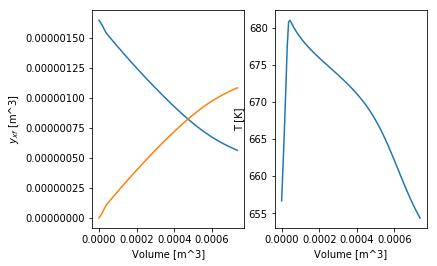

In [5]:

def conversion(X):
    Tf,Ta=X
    sol=odeint(PFRrev,[Ft*yxf,0,Tf],Vrange,(Ta,))
    return sol[-1,0]*1e6

from scipy.optimize import minimize 
minpos=minimize(conversion,[610,620])
sol=odeint(PFRrev,[Ft*yxf,0,minpos.x[0]],Vrange,(minpos.x[1],))
print(minpos.x)
print(1-(sol[-1,0]/sol[0,0]))
plt.subplot(1, 2, 1)
plt.plot(Vrange,sol[:,0:2])
plt.xlabel('Volume [m^3]')
plt.ylabel('$y_{xf}$ [m^3]')

plt.subplot(1, 2, 2)
plt.plot(Vrange,sol[:,2])
plt.xlabel('Volume [m^3]')
plt.ylabel('T [K]')
plt.show()
